## <u> Dispersion Extraction Using FFT Method </u>

## Script information:
- This file is supposed to provide the best method of extracting the difference in spectral phase and then the GVD from OSA traces
- Provide data files from the OSA as csv's
- They will be converted to $\omega$, interpolated and the FFT procedure applied

In [87]:
# ********* Import modules ********* #
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import pandas as pd
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
add_to_path_2 = os.path.join(parent_directory, "Modules/General-Python-Classes")
os.listdir(parent_directory)
print(add_to_path)

sys.path.append(add_to_path)
sys.path.append(add_to_path_2)
import RefractiveIndexClass
from DispersionExtractionClass import DispersionExtraction as de


/Users/jackmorse/Documents/University/Year 4/FYP/Modules/Refractive_Indices


-0.0142


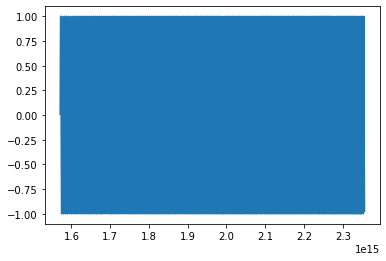

In [66]:
# Generate data:
import numpy as np
wavelengths = np.linspace(800, 1200, 10000)
omegas = 2 * np.pi * 3e17 / np.array(wavelengths)
omegas = np.linspace(max(omegas), min(omegas), len(wavelengths))
L_f = 0.01
DeltaL_air = - L_f * RefractiveIndexClass.RefractiveIndex.n_group(RefractiveIndexClass.RefractiveIndex.n_fs, 500) 
DeltaL_air = - 0.0142
print(DeltaL_air)
n_f = RefractiveIndexClass.RefractiveIndex.n_fs(wavelengths)
phase = (omegas / 3e8) * (DeltaL_air + L_f * n_f)
plt.plot(omegas, np.cos(phase))
cos_phi = np.cos(phase) + 1
omegas2 = omegas

##### Read OSA data (in wavelengths) from a CSV

In [67]:
import os
import time
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
#directory_path = '/Users/jackmorse/Documents/University/Year 4/FYP/Data/21-Feb-2024/csv/'

# Was uncommented
# directory_path = r'C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData'

# # Get a list of CSV files in the directory
# csv_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.csv')])
# print(csv_files)
# total_files = len(csv_files)






# Loop through each CSV file
# for i, csv_file in enumerate(csv_files, start=1):
#     file_path = os.path.join(directory_path, csv_file)

#     # Read CSV file into a DataFrame
#     data = pd.read_csv(file_path, header = None)

#     # Plot the data
#     plt.plot(data[0], data[1])
    
#     # Set plot title
#     match = re.search(r'\d+of\d+', csv_file)
#     title_pattern = match.group() if match else f"NoPatternFound_{i}"

#     plt.title(f"{title_pattern}")

#     # Show the plot
#     plt.show()

#     # Pause for 1 second before the next iteration
#     # time.sleep(1)



OSA Spectrum Full: 


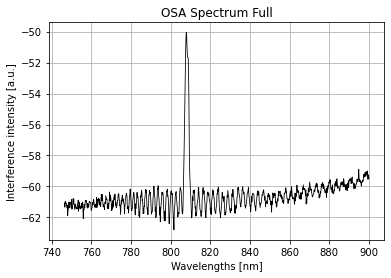

OSA Spectrum: 


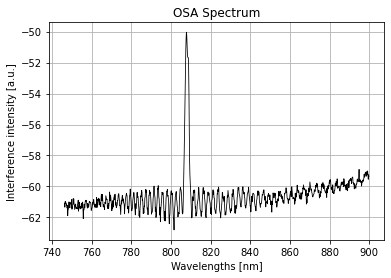

OSA Spectrum in Omega after Linear Interpolation: 


Text(0, 0.5, 'Interference intensity [a.u.]')

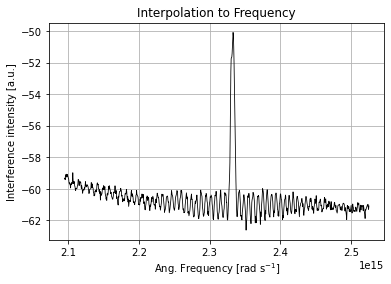

In [68]:
# Provide data:
data_set = "b6"
interference_data_path =  "/Users/jackmorse/Documents/University/Year 4/FYP/Data/21-Feb-2024/csv/HCF_120cm_16of40_61510um_Jack_21022024_1019.csv" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_fringes.csv"
# interference_data_path = r'C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData\HCF_120cm_16of40_61510um_Jack_21022024_1019.csv'
reference_data_path = "" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_ref.csv"
fibre_data_path = "" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_signal.csv"
min_wavelength = 740
max_wavelength = 900
c = 3e17                                                        # SOL in nm / s
skiprows = 40
xlim = None

# Interference, reference and fibre read in:
data = pd.read_csv(interference_data_path, header=None, skiprows=skiprows)
fringes_x = data[0]
fringes_y = data[1]

if reference_data_path != "":
    data = pd.read_csv(reference_data_path, header=None, skiprows=skiprows)
    ref_x = data[0]
    ref_y = data[1]

if fibre_data_path != "":
    data = pd.read_csv(fibre_data_path, header=None, skiprows=skiprows)
    signal_x = data[0]
    signal_y = data[1]

# Restrict and divide by reference and fibre arms
idx = np.where((fringes_x > min_wavelength) & (fringes_x < max_wavelength))[0]
wavelengths = fringes_x[idx]
if (reference_data_path != "" and fibre_data_path != ""):
    show_all_traces = True 
    if show_all_traces:
        print("All OSA traces")
        plt.plot(fringes_x, fringes_y, color = 'r', linewidth = 0.8, label = "Fringes")
        plt.plot(signal_x, signal_y, color = 'g', linewidth = 0.8, label = "Signal")
        plt.plot(ref_x, ref_y, color = 'b', linewidth = 0.8, label = "Reference")
        plt.grid()
        plt.legend()
        plt.title("OSA All Traces")
        plt.xlabel("Wavelengths [nm]")
        plt.ylabel("Interference intensity [a.u.]")
        if xlim is not None:
            plt.xlim(xlim)
        plt.show()
    correlation_product_intensity = ((fringes_y - ref_y - signal_y) + np.sqrt(ref_y * signal_y)) /(2 * np.sqrt(ref_y * signal_y))
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, correlation_product_intensity, color = 'k', linewidth = 0.8, label = "Scaled")       
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.legend()
    if xlim is not None:
            plt.xlim(xlim)
    plt.show()
    intensity = correlation_product_intensity[idx]
else:
    intensity = fringes_y[idx]
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, fringes_y, color = 'k', linewidth = 0.8)
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.show()


print("OSA Spectrum: ")
plt.plot(wavelengths, intensity, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("OSA Spectrum")
plt.xlabel("Wavelengths [nm]")
plt.ylabel("Interference intensity [a.u.]")
plt.show()

# Convert from wavelengths to frequency for ease of the FT, using linear interpolation:
def linear_interpolation_omega_wavelength(x, y):
    from scipy import interpolate
    x = 2 * np.pi * c / x                                           # Frequency in rad/s
    x_grid = np.linspace(min(x), max(x), len(y))                    # Adjust the number of points as needed        
    linear_interp = interpolate.interp1d(x, y, kind='linear')       # Perform linear interpolation
    y_interp = linear_interp(x_grid)
    return x_grid, y_interp

omegas, interference_intensity_omega = linear_interpolation_omega_wavelength(wavelengths, intensity)
x = omegas
y = interference_intensity_omega
print("OSA Spectrum in Omega after Linear Interpolation: ")
plt.plot(omegas, interference_intensity_omega, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("Interpolation to Frequency")
plt.xlabel(r"Ang. Frequency [rad s$^{-1}$]")
plt.ylabel("Interference intensity [a.u.]")

#### Scaling the interference using other traces if provided:

In [69]:
# NEEDS WORK, NEED TO INTERPOLATE OTHER DATA TOO
if not (reference_data_path == "" or fibre_data_path == ""):
    pass
    # Scale the interference by dividing by the others in the normal way

##### FFT the data:

960
960
960
960


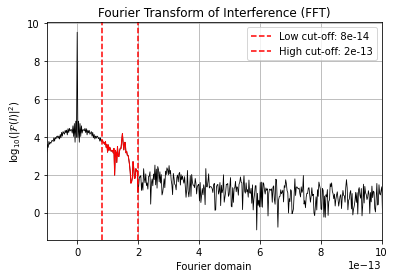

In [70]:
xscale = 1e-12
keep_min_freq =  0.08 * xscale
keep_max_freq = 2e-13 # 0.2 * xscale
xlim = [-0.1 * xscale, 1 * xscale]
ylim = None

print(len(x))
print(len(y))
[xf, yf] = de.TraceFFT(x, y, normalise=False, hanning=False) # de.TraceFFT(x = x, y = y, normalise = False, hanning = False)
print(len(yf))
print(len(xf))
plt.plot(xf, np.log10(np.abs(yf)**2), color = 'k', linewidth = 0.8)
plt.axvline(keep_min_freq, color = 'red', linestyle = '--', label= f"Low cut-off: {keep_min_freq}")
if keep_max_freq is not None:
    plt.axvline(keep_max_freq, color = 'red', linestyle = '--', label= f"High cut-off: {keep_max_freq}")
idx = de.FilterIndicesFFT(xf, np.abs(yf), "right", keep_min_freq, keep_max_freq)
filtered_fourier_data = de.BoxFilter(yf, idx)
plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])**2), color='red', linewidth = 1)
plt.grid()
plt.legend()
plt.title("Fourier Transform of Interference (FFT)")
plt.xlabel("Fourier domain")
plt.ylabel(r'$\log_{10}(|\mathcal{F}(I)|^2)$')
# plt.ylim([5,6])
if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.show()

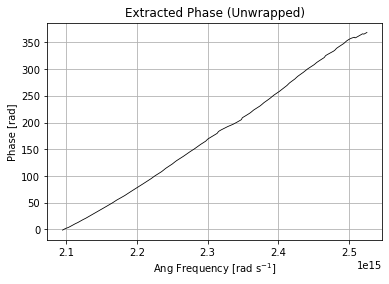

In [71]:
filtered_y = de.InverseFFT(filtered_fourier_data)
final_ys = de.ExtractAndUnwrap(filtered_y)
plt.plot(x, final_ys, color = 'k', linewidth = 0.8)
plt.title("Extracted Phase (Unwrapped)")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Ang Frequency [rad s$^{-1}$]")
plt.grid()
plt.show()

#### Convert back to wavelength from omega:

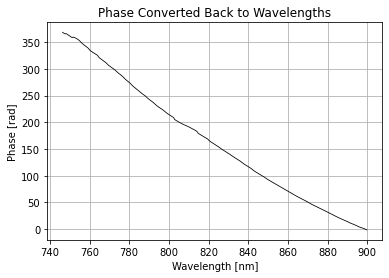

In [72]:
wavelengths, phase = linear_interpolation_omega_wavelength(x, final_ys)
plt.plot(wavelengths, phase, color = 'k', linewidth = 0.8)
plt.title("Phase Converted Back to Wavelengths")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Wavelength [nm]")
plt.grid()
plt.show()

#### Obtain $\beta$ from the phase

Text(0, 0.5, '$\\beta(\\lambda)$ [rad]')

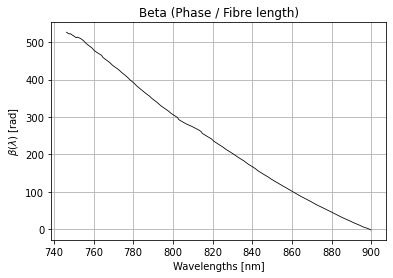

In [73]:
fibre_length = 0.7 
beta_lambda = de.ObtainBetaFromPhi(phase, fibre_length)
plt.plot(wavelengths, beta_lambda, color='k', linewidth = 0.8)
plt.grid()
plt.title("Beta (Phase / Fibre length)")
plt.xlabel("Wavelengths [nm]")
plt.ylabel(r'$\beta(\lambda)$ [rad]')
# plt.xlim([800, 825])
# plt.ylim([0, 150])

In [74]:
def CDA2(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf
    
    ! Step size must be the same as the grid step. !
    '''
    second_derivative = []
    last_point = len(func_vals) - 1
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[0] - 5 * func_vals[1] + 4 * func_vals[2] - func_vals[3]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[2] - 2 * func_vals[1] + func_vals[0])) # If the FDA ever fails use these.
    for i in range(1, last_point):
        second_derivative.append((1 / (step_size**2)) * (func_vals[i + 1] + func_vals[i - 1] - 2 * func_vals[i]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[last_point] - 2 * func_vals[last_point - 1] + func_vals[last_point - 2])) # If the BDA ever fails use these.
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[last_point] - 5 * func_vals[last_point - 1] + 4 * func_vals[last_point - 2] - func_vals[last_point - 3]))
    return second_derivative

def CDA1(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

    ! Step size must be the same as the grid step. !
    '''
    first_derivative = []
    last_point = len(func_vals) - 1
    first_derivative.append((1 / (2 * step_size)) * (-3 * func_vals[0] + 4 * func_vals[1] - func_vals[2] - func_vals[3]))
    for i in range(1, last_point):
        first_derivative.append((1 / (2 * step_size)) * (func_vals[i + 1] - func_vals[i - 1]))
    # first_derivative.append((1 / (step_size)) * (func_vals[last_point] - func_vals[last_point - 1]))
    first_derivative.append((1 / (2 * step_size)) * (3 * func_vals[last_point] - 4 * func_vals[last_point - 1] + func_vals[last_point - 2]))
    return first_derivative

def beta_lambda_func(refractive_index, wavelengths):
    beta = []
    for i in range(len(refractive_index)):
        beta.append(2 * np.pi * refractive_index[i] / wavelengths[i])
    return beta

def GVD_lambda_func(beta, wavelengths, output_ps_nm_km = True):
    '''
    GVD which is expressed as beta_2 * (-2 pi c / lambda**2). Sometimes denoted D.

    Parameters
    -------
    beta ([float]]): Array of beta values in nm^-1
    wavelengths ([float]): Array of wavelengths corresponding to the beta array in nm
    output_ps_nm_km (bool): Output can be given in expected units from input (s / nm*nm) [False] or in conventional (ps / nm*km) [True - Default].

    Returns
    -------
    GVD as an array.
    '''
    c0 = 3e17                                                           # Speed of light in vacuum in nm / s
    first_derivative = CDA1(beta, wavelengths[1] - wavelengths[0])
    second_derivative = CDA2(beta, wavelengths[1] - wavelengths[0])
    GVD = []
    for i in range(len(beta)):
        GVD.append(-1 * ((2 * np.pi * c0) / (wavelengths[i]**2)) * ( ( (wavelengths[i]**3) / (2 * np.pi**2 * c0**2) ) * first_derivative[i] + ( (wavelengths[i]**4) / ((2 * np.pi * c0)**2) ) * second_derivative[i] ) )
    if output_ps_nm_km:
        GVD = np.array(GVD) * 1e24                                      # Converts from s / nm*nm to ps / nm*km (conventional).
    return GVD

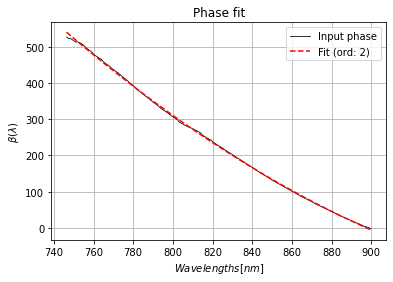

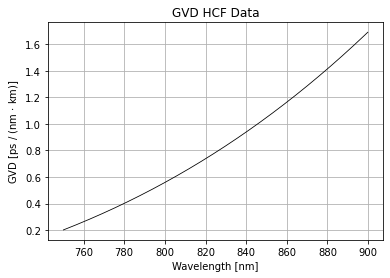

0.0


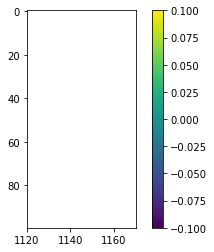

Normalised gap value not a float, defaulting to bessel zero.


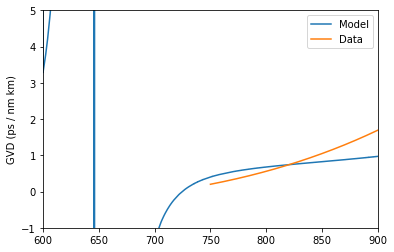

In [75]:
GVD_lambda = de.GVD_lambda(beta_lambda, wavelengths, method = "Fit", order = 2, show_plots = True)
idx = np.where(wavelengths > 750)[0]
wavelengths = wavelengths[idx]
GVD_lambda = GVD_lambda[idx]
plt.plot(wavelengths, GVD_lambda * 1000, color = 'k', linewidth = 0.8, label = "Data")
plt.grid()
# print(GVD_lambda)
plt.title("GVD HCF Data")
plt.ylabel(r"GVD [ps / (nm $\cdot$ km)]")
plt.xlabel("Wavelength [nm]")
plt.show()
plt.xlim([1120, 1170])



ws = np.linspace(0.1e-6, 0.9e-5, 100)
Rs = np.linspace(20e-6, 30e-6, 100)
global_error = np.zeros((len(ws), len(Rs)))
print(global_error[0, 99])
i = 0
j = 0
best_R = 100000
best_w = 100000
min_error = 10000
# for w in ws:
#     for R in Rs:        
#         print(f"i j = {i}, {j}")
#         refractive_index_HCF = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R, w=w,part="R")
#         beta_HCF = beta_lambda_func(refractive_index_HCF, wavelengths)
#         GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
#         current_error = np.sqrt(np.mean((np.array(GVD_HCF) - np.array(GVD_lambda)) ** 2))
#         global_error[i, j] = current_error
#         if current_error < min_error:
#             min_error = current_error
#             best_w = w
#             best_R = R
#         j += 1
#     j = 0
#     i += 1
        
        
plt.imshow(global_error)
plt.colorbar()
# plt.xlim([95, 100])
# plt.ylim([95, 100])
plt.show()
# HCF Model
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
X = [6.1e-07, 2.4000000e-05]


R_op = X[1]
w_op = X[0]
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R_op,w=w_op,part="R")
beta_HCF = beta_lambda_func(index, simulation_wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([600,900])
# plt.ylim([-10e-9, 10e-9])
plt.ylim(-1, 5.0)
plt.show()

E
[2.08184717e+07 8.33963912e-01 8.34499567e-01 8.35064559e-01
 8.35572714e-01 8.36099857e-01 8.36640861e-01 8.37231172e-01
 8.37703335e-01 8.38295688e-01 8.38840758e-01 8.39373975e-01
 8.39930856e-01 8.40424945e-01 8.41054516e-01 8.41570361e-01
 8.42089376e-01 8.42687965e-01 8.43198074e-01 8.43777595e-01
 8.44299131e-01 8.44879967e-01 8.45392582e-01 8.45954343e-01
 8.46560252e-01 8.47082629e-01 8.47639000e-01 8.48142488e-01
 8.48792658e-01 8.49338924e-01 8.49817038e-01 8.50467817e-01
 8.50999401e-01 8.51529640e-01 8.52135589e-01 8.52648080e-01
 8.53226259e-01 8.53824096e-01 8.54354373e-01 8.54976501e-01
 8.55479851e-01 8.56106240e-01 8.56686114e-01 8.57214402e-01
 8.57768468e-01 8.58343357e-01 8.58934108e-01 8.59535770e-01
 8.60060790e-01 8.60669308e-01 8.61273838e-01 8.61786715e-01
 8.62368279e-01 8.62972299e-01 8.63511058e-01 8.64186570e-01
 8.64662663e-01 8.65348562e-01 8.65825003e-01 8.66460064e-01
 8.67041570e-01 8.67606028e-01 8.68231554e-01 8.68830220e-01
 8.69397074e-01 8.6996

<ipython-input-76-fe7ca7958c37>:26: OptimizeWarning: Unknown solver options: pgtol
  result = minimize(min2, [w, R], bounds=[(0.45e-6, 0.5e-6), (22e-6, 25e-6)],  options={'pgtol': 1e-25}, tol=1e-25)


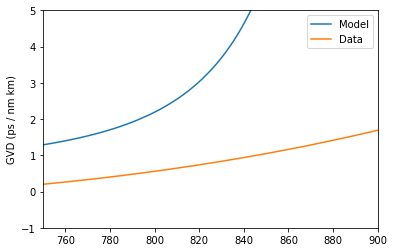

In [76]:
from functools import partial
from scipy.optimize import minimize
#HCF_new = partial(RefractiveIndexClass.RefractiveIndex.HCF, wavelengths = wavelengths, mode = [1, 1], n_gas = None, n_wall = None, R = 24e-6, part = "Real", parameter = "wavelength", normalised_gap = True, r_cap = None, M = 6)

def HCF(wavelengths, w, R):
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths = wavelengths, w=w, R=R, normalised_gap=True)
    beta_HCF = beta_lambda_func(index, wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
    return GVD_HCF

HCF_new = partial(HCF, wavelengths)
print("E")
# print(HCF_new(w=0.7e-6))
def func_to_min_GVD(HCF_new_1, lab_data, X):
    w = X[0]
    R = X[1]
    return np.sqrt(np.mean((HCF_new_1(w, R) - lab_data)**2))

w = 0.9e-6
R=24e-6
c =[5.0e-07, 2.2e-05]
print(HCF(wavelengths, 5e-7, 2.2e-5))

min2 = partial(func_to_min_GVD, HCF_new, GVD_lambda*1000)
min2([0.7e-6,R])
result = minimize(min2, [w, R], bounds=[(0.45e-6, 0.5e-6), (22e-6, 25e-6)],  options={'pgtol': 1e-25}, tol=1e-25)
print(result)

R_op = result.x[1]
w_op = result.x[0]
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R_op,w=w_op,part="R")
beta_HCF = beta_lambda_func(index, simulation_wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([750,900])
# plt.ylim([-10e-9, 10e-9])
plt.ylim(-1, 5.0)
plt.show()
c =[5.0e-07, 2.2e-05]

4.5e-07


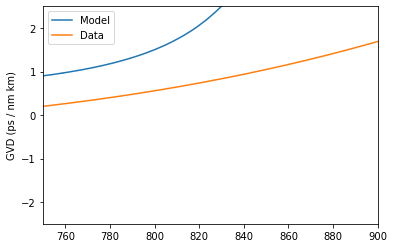

4.5714285714285715e-07


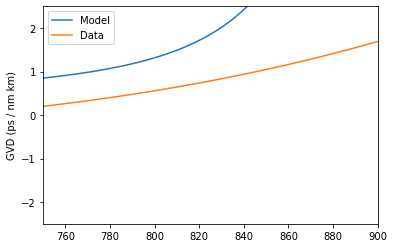

4.6428571428571427e-07


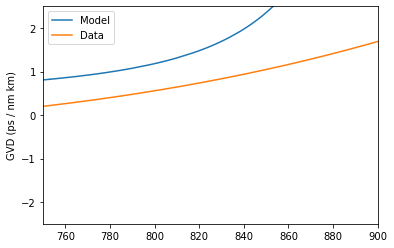

4.714285714285714e-07


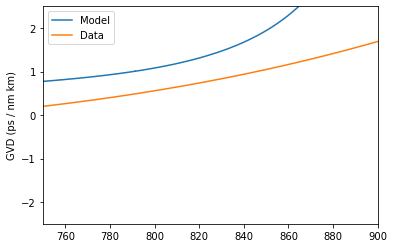

4.785714285714286e-07


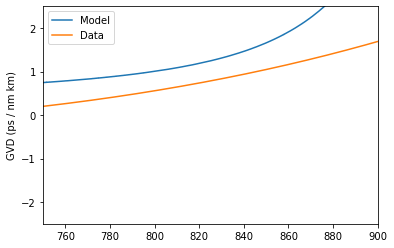

4.857142857142857e-07


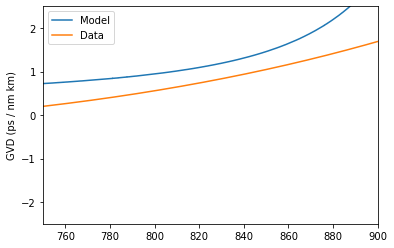

4.928571428571429e-07


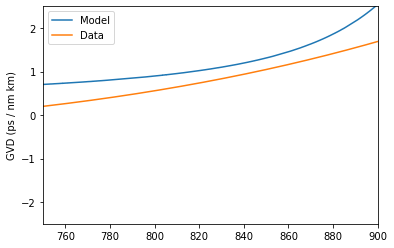

5e-07


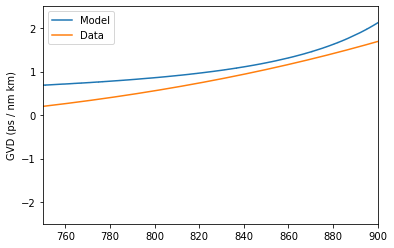

5.071428571428571e-07


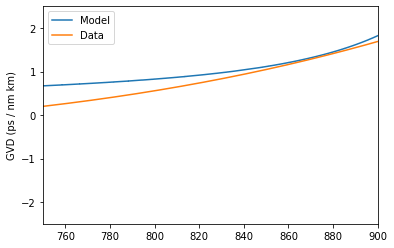

5.142857142857143e-07


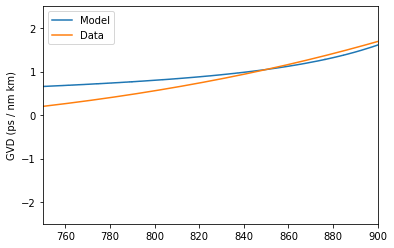

5.214285714285714e-07


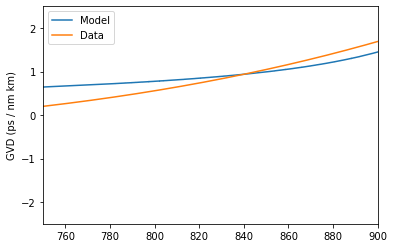

5.285714285714286e-07


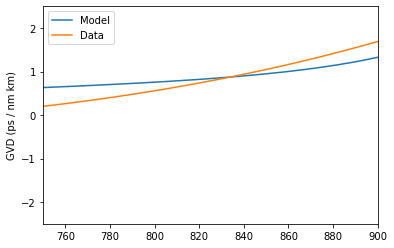

5.357142857142858e-07


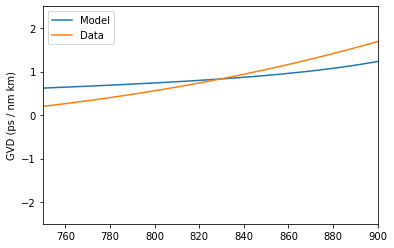

5.428571428571429e-07


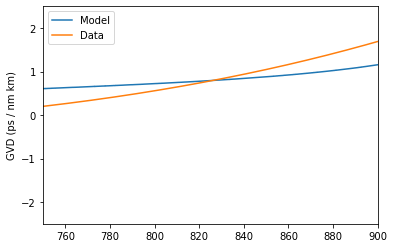

5.5e-07


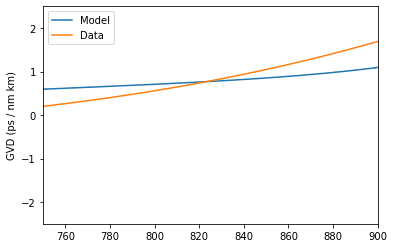

In [77]:
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
ws = np.linspace(0.45e-6, 0.55e-6, 15)
for w in ws:
    print(w)
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=24e-6,w=w,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, w, 24e-6, 0.7*24e-6))
    beta_HCF = beta_lambda_func(index, simulation_wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
    plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
    plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
    plt.ylabel("GVD (ps / nm km)")
    plt.legend()
    plt.xlim([750,900])
    #plt.ylim([-10e-9, 10e-9])
    plt.ylim(-2.5, 2.5)
    plt.show()

[750.08 750.24 750.4  750.56 750.72 750.88 751.04 751.2  751.36 751.52
 751.68 751.84 752.   752.16 752.32 752.48 752.64 752.8  752.96 753.12
 753.28 753.44 753.6  753.76 753.92 754.08 754.24 754.4  754.56 754.72
 754.88 755.04 755.2  755.36 755.52 755.68 755.84 756.   756.16 756.32
 756.48 756.64 756.8  756.96 757.12 757.28 757.44 757.6  757.76 757.92
 758.08 758.24 758.4  758.56 758.72 758.88 759.04 759.2  759.36 759.52
 759.68 759.84 760.   760.16 760.32 760.48 760.64 760.8  760.96 761.12
 761.28 761.44 761.6  761.76 761.92 762.08 762.24 762.4  762.56 762.72
 762.88 763.04 763.2  763.36 763.52 763.68 763.84 764.   764.16 764.32
 764.48 764.64 764.8  764.96 765.12 765.28 765.44 765.6  765.76 765.92
 766.08 766.24 766.4  766.56 766.72 766.88 767.04 767.2  767.36 767.52
 767.68 767.84 768.   768.16 768.32 768.48 768.64 768.8  768.96 769.12
 769.28 769.44 769.6  769.76 769.92 770.08 770.24 770.4  770.56 770.72
 770.88 771.04 771.2  771.36 771.52 771.68 771.84 772.   772.16 772.32
 772.4

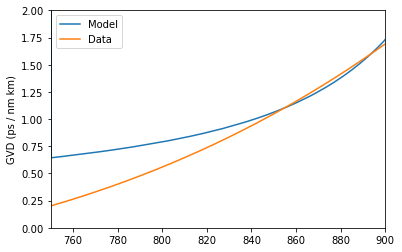

R_op = 2.45e-05, w_op = 5.071428571428571e-07


In [88]:


# Double

simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)

# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
smallest_difference = -1
Rs = np.linspace(23.5e-6, 24.5e-6, 15)
ws = np.linspace(0.4e-6, 0.7e-6,15)
print(wavelengths)
w_op = 0
R_op = 0
for w in ws:
    for R in Rs:
        # print(R)
        index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R,w=w,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
        beta_HCF = beta_lambda_func(index, wavelengths)
        GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
        idx = np.where(wavelengths > 775)[0]
        wavelengths2 = wavelengths[idx]
        GVD_lambda2 = GVD_lambda[idx]
        GVD_HCF = GVD_HCF[idx]
        difference =  np.sqrt(np.mean((GVD_HCF - GVD_lambda2*1000)**2))
        # plt.plot(wavelengths2, GVD_HCF,label="model")
        # plt.plot(wavelengths2, GVD_lambda2*1000, label="Data")
        # # plt.xlim(760, 900)
        # plt.ylim([0,5])
        # plt.legend()
        # plt.show()
        # import time
        # time.sleep(1)
        
        # plt.close()
        if smallest_difference == -1:
            smallest_difference = difference
            w_op = w
            R_op = R
            print(f"First iteration: Setting difference to {smallest_difference}")            
        elif difference < smallest_difference:
            smallest_difference = difference
            w_op = w
            R_op = R
            print(f"Difference updated: New value is {smallest_difference}")
        

index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R_op,w=w_op,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
beta_HCF = beta_lambda_func(index, wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
plt.plot(wavelengths, np.array(GVD_HCF), label = "Model")
plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([750,900])
#plt.ylim([-10e-9, 10e-9])
plt.ylim(0, 2)
plt.show()
print(f"R_op = {R_op}, w_op = {w_op}")

# Saving data..
from DataAnalysisClass import DataHandling as DH
DH.write_csv("./Report-Data/HCF_dispersion_measurement_fit_01.csv", [wavelengths, GVD_HCF, GVD_lambda*1000], ["wavelengths_nm", "GVD_model_ps_nm_km", "GVD_data_ps_nm_km"])

2.3e-05


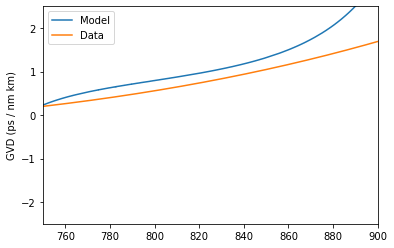

2.3142857142857142e-05


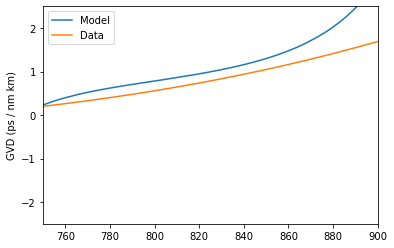

2.3285714285714287e-05


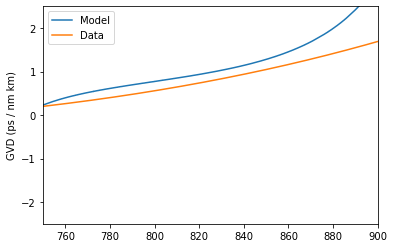

2.342857142857143e-05


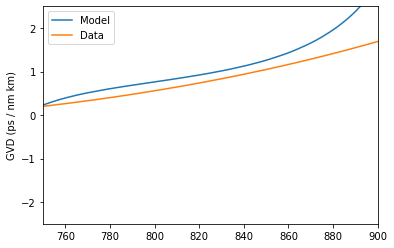

2.357142857142857e-05


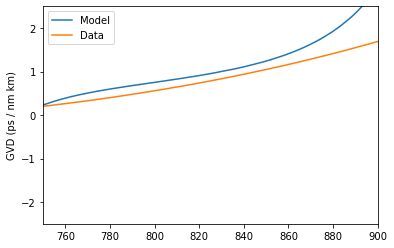

2.3714285714285713e-05


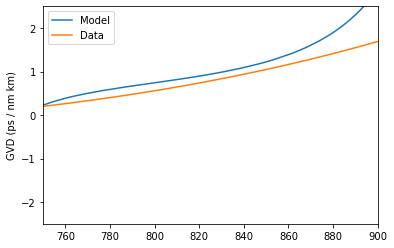

2.385714285714286e-05


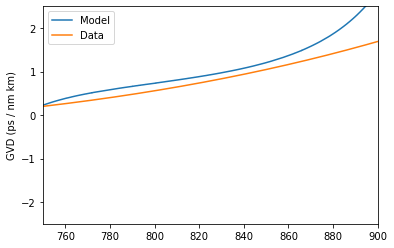

2.4e-05


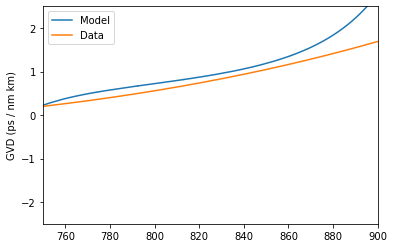

2.4142857142857143e-05


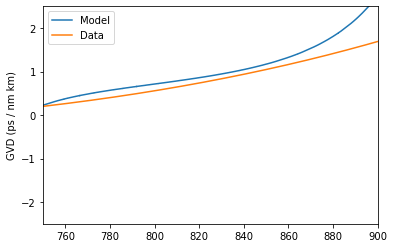

2.4285714285714288e-05


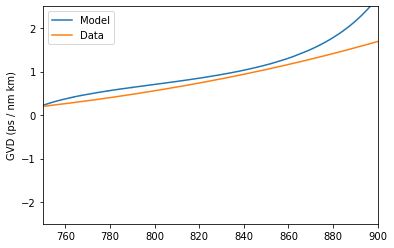

2.442857142857143e-05


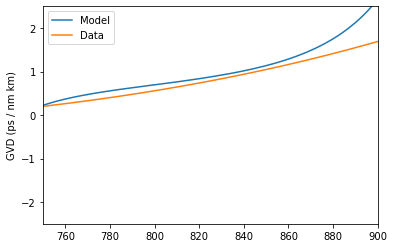

2.4571428571428572e-05


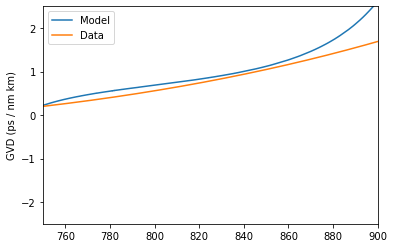

2.4714285714285714e-05


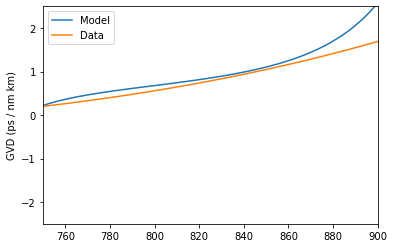

2.485714285714286e-05


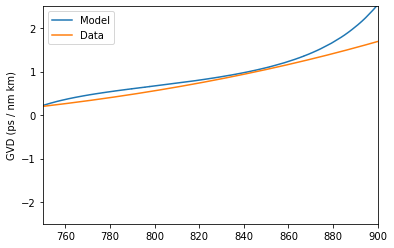

2.5e-05


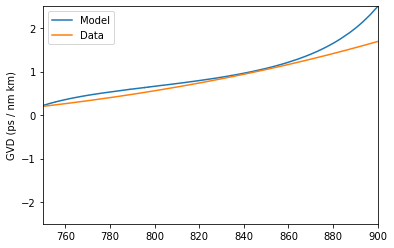

In [ ]:
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
Rs = np.linspace(23e-6, 25e-6, 15)
for R in Rs:
    print(R)
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R,w=9.5e-07,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
    beta_HCF = beta_lambda_func(index, simulation_wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
    plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
    plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
    plt.ylabel("GVD (ps / nm km)")
    plt.legend()
    plt.xlim([750,900])
    #plt.ylim([-10e-9, 10e-9])
    plt.ylim(-2.5, 2.5)
    plt.show()